In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importando os Dados

são dois os conjuntos de dados de interesse

* os dados cadastrais dos filmes.
* os dados dos ratings dos usuários ```u.data```

Da descrição do dataset temos

```
u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC  
              
u.item     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.

```


## Importação da bae de ratings (u.data)

In [184]:
ratingsDF = pd.read_csv("..\\RawData\\ml-100k\ml-100k\\u.data", header=None, sep='\t', names=['uid', 'id', 'rating', 'timestamp'])

In [185]:
print("O tamanho do dataset #linhas:", len(ratingsDF))

O tamanho do dataset #linhas: 100000


preview do dataset de filmes

In [186]:
ratingsDF.head(5)

,uid,id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


conferindo os tipos de dados

In [187]:
ratingsDF.dtypes

uid          int64
id           int64
rating       int64
timestamp    int64
dtype: object

Embora não precisássemos nos importar com a coluna de *timestamp*, isso pode nos ajudar a ganhar insight sobre o tipo de dado que encontraremos na base na etapa de exploração e por hora, prefiro mantê-la com a unidade apropriada

In [188]:
ratingsDF_typed = ratingsDF
ratingsDF_typed['timestamp'] = pd.to_datetime(ratingsDF['timestamp'], unit='s')

In [189]:
ratingsDF_typed['rating'] = ratingsDF_typed['rating'].astype('category')

In [190]:
ratingsDF_typed.head(5)

,uid,id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [191]:
print("O tamanho do dataset de ratings após ter sido carregado e tipado corretamente é:", ratingsDF_typed.size, "B")

O tamanho do dataset de ratings após ter sido carregado e tipado corretamente é: 400000 B


## Importação da bae cadastral (u.item)

In [192]:
moviesDFColsNames = "movie id | movie title | release date | video release date | \
              IMDb URL | unknown | Action | Adventure | Animation | \
              Children's | Comedy | Crime | Documentary | Drama | Fantasy | \
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | \
              Thriller | War | Western".split('|')

In [193]:
moviesDFColsNames = [x.strip().replace(' ','_') for x in moviesDFColsNames]

In [194]:
print(moviesDFColsNames)

['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [195]:
moviesDF = pd.read_csv("..\\RawData\\ml-100k\ml-100k\\u.item", header=None, sep='|', encoding="ISO-8859-1", names=moviesDFColsNames)

Observações sobre a leitura do arquivo

> *Aparentemente o dataset está em codificação ISO.*
> Apesar dos metadados da base terem dito que o arquivo era separado por tab, o dado acabou mostando que a separação era por '|'

In [196]:
moviesDF.head(5)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [197]:
print("O tamanho do dataset #linhas:", len(moviesDF))

O tamanho do dataset #linhas: 1682


In [198]:
print("A coluna 'video_release_date' tem # ", moviesDF["video_release_date"].isnull().values.sum(), "registros nuloos")

A coluna 'video_release_date' tem #  1682 registros nuloos


In [199]:
categprocal_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
for c in categprocal_columns:
    moviesDF[c] = moviesDF[c].astype('category')

essa é uma coluna toda nula e já podemos descartá-la, vou manter a coluna de release date que tem informação pra ganhar insight sobre os filmes da base.

In [200]:
moviesDF_typed = moviesDF
moviesDF_typed['release_date'] = pd.to_datetime(moviesDF['release_date'], format='%d-%b-%Y')
moviesDF_typed.drop(columns=["video_release_date"], inplace =True)

In [201]:
print("O tamanho do dataset de ratings após ter sido carregado e tipado corretamente é:", moviesDF_typed.size, "B")

O tamanho do dataset de ratings após ter sido carregado e tipado corretamente é: 38686 B


## Explorando os dados

Embora para o problema em questão, não estejamos interessados na maioria das infomações do dataset, por exemplo, datas e gêneros de filmes, isso pode nos ajudar a compreender melhor os dados.

In [202]:
ratingsDF_typed.describe(include='all')

,uid,id,rating,timestamp
count,100000.00000,100000.000000,100000.0,100000
unique,NaN,NaN,5.0,49282
top,NaN,NaN,4.0,1998-03-27 21:20:06
freq,NaN,NaN,34174.0,12
first,NaN,NaN,NaN,1997-09-20 03:05:10
last,NaN,NaN,NaN,1998-04-22 23:10:38
mean,462.48475,425.530130,NaN,NaN
std,266.61442,330.798356,NaN,NaN
min,1.00000,1.000000,NaN,NaN
25%,254.00000,175.000000,NaN,NaN


In [203]:
moviesDF_typed.describe(include='all')

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,1682,1681,1679,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,...,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0,1682.0
unique,NaN,1664,240,1660,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,NaN,"Designated Mourner, The (1997)",1995-01-01 00:00:00,http://us.imdb.com/Title?Desperate+Measures+(1...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,2,215,2,1680.0,1431.0,1547.0,1640.0,1560.0,1177.0,...,1660.0,1658.0,1590.0,1626.0,1621.0,1435.0,1581.0,1431.0,1611.0,1655.0
first,NaN,NaN,1922-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,1998-10-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,485.695893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,421.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observações**
> Não há nulos em nehuma das colunas.

> Os quaris de Ids paracem bastante uniformes, o que deve indicar que os filmes são uniformemente escolhidos, mas isso deve ser invesigado através do histograma. Isso parece valer para as colunas de filme e de usuário.

> O rating médio dos fimles é 3.5 com descvio padrão de 1. Um histograma e um teste de chi-square devem validar a hipotése de ser uma distribuição normal.

> Os quaris de Ids paracem bastante uniformes, o que deve indicar que os filmes são uniformemente escolhidos, mas isso deve ser invesigado através do histograma

### Teste de uniformidade da distribuição de id de usuários

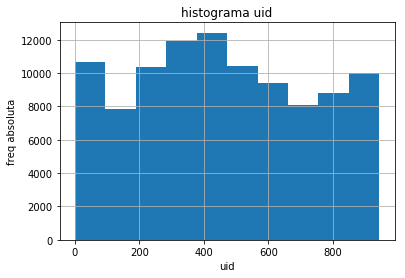

In [204]:
plt.figure()
ratingsDF_typed['uid'].plot.hist(bins=10)
plt.grid()
plt.title("histograma uid")
plt.xlabel("uid")
plt.ylabel("freq absoluta")
plt.show()

**Hipótese** essa distribuição de IDs não é uniforme. 

Deve haver algum tipo de viés na forma como as amostras foram escolhidas. Pode ser que algum outro fator não representado no banco explique esse viés, por exemplo, o engajamento do usuário com o site cai com o tempo (e os IDs são sequenciais).

### Visualizando a distribuição dos filmes

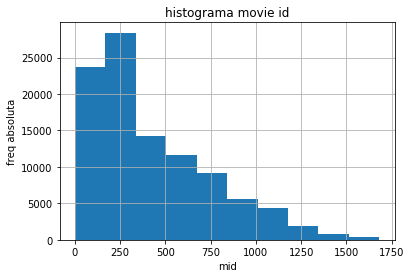

In [205]:
plt.figure()
ratingsDF_typed['id'].plot.hist(bins=10)
plt.grid()
plt.title("histograma movie id")
plt.xlabel("mid")
plt.ylabel("freq absoluta")
plt.show()

vamos executar o join dos datasets para enriquecer as análises - os nomes dos filmes ajudam na comunicação dos resultados também.

In [206]:
genderFreq = moviesDF_typed[categprocal_columns].describe().loc[['freq']].values

idx_top_gender = np.argmax(genderFreq)
idx_botton_gender = np.argmin(genderFreq)

print("gênero mais frequente: ", categprocal_columns[idx_top_gender])
print("gênero menos frequente: ", categprocal_columns[idx_botton_gender])

gênero mais frequente:  unknown
gênero menos frequente:  Drama


### verificando duplicatas na base de cadastro

In [207]:
moviesDF_typed.rename(index=str, columns={"movie_id": "id"}, inplace=True)

In [208]:
movieNamesDistinctCount = moviesDF_typed["movie_title"].nunique()
numMovieIdsDistinctCount = moviesDF_typed["id"].nunique()
print(" Número de distintos na olunas de id de filme e nome de filme são iguais? ?" ,movieNamesDistinctCount == numMovieIdsDistinctCount,movieNamesDistinctCount, numMovieIdsDistinctCount )

 Número de distintos na olunas de id de filme e nome de filme são iguais? ? False 1664 1682


Os títulos dos filmes que aparecem mais de uma vez na base de cadastro são

In [209]:
duplicatedFilmsNames = (moviesDF_typed["movie_title"].value_counts() != 1)
duplicatedFilmsNames = duplicatedFilmsNames[duplicatedFilmsNames.values == True].index.tolist()
# moviesDF_typed.groupby(["movie_title", "id"]).count()

In [210]:
duplicated_films = moviesDF_typed[moviesDF_typed["movie_title"].isin(duplicatedFilmsNames)]

In [211]:
duplicated_films

,id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
245,246,Chasing Amy (1997),1997-01-01,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
265,266,Kull the Conqueror (1997),1997-08-29,http://us.imdb.com/M/title-exact?Kull+the+Conq...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,268,Chasing Amy (1997),1997-01-01,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
296,297,Ulee's Gold (1997),1997-01-01,http://us.imdb.com/M/title-exact?Ulee%27s+Gold...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,303,Ulee's Gold (1997),1997-01-01,http://us.imdb.com/M/title-exact?Ulee%27s+Gold...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,304,Fly Away Home (1996),1996-09-13,http://us.imdb.com/M/title-exact?Fly%20Away%20...,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
304,305,"Ice Storm, The (1997)",1997-01-01,http://us.imdb.com/M/title-exact?Ice+Storm%2C+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308,309,Deceiver (1997),1997-01-01,http://us.imdb.com/M/title-exact?Liar+(1997),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,329,Desperate Measures (1998),1998-01-30,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
347,348,Desperate Measures (1998),1998-01-30,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [212]:
colsExceptID = duplicated_films.columns[1:].tolist()

duplicated columns on subset of duplicated name films:

In [213]:
duplicated_sroted = duplicated_films.sort_values(["movie_title", "id"])
print("duplicated rows", duplicated_sroted.duplicated(subset=colsExceptID).sum(), len(duplicated_sroted) )

duplicated rows 18 36


por isso é possível simplesmente descartaras linhas que são meras duplicatas. Decidi ficar com a primeira, mas devo inspecionar a base de ratings para ver se os IDs duplicados foram utilizados 

In [214]:
print("numero de ratings do filme 'Chasing Amy (1997)' usando o id 246", ratingsDF_typed[ratingsDF_typed["id"] == 246]["id"].count())
print("numero de ratings do filme 'Chasing Amy (1997)' usando o id 268", ratingsDF_typed[ratingsDF_typed["id"] == 268]["id"].count())

numero de ratings do filme 'Chasing Amy (1997)' usando o id 246 124
numero de ratings do filme 'Chasing Amy (1997)' usando o id 268 255


ou seja, há ratings para o mesmo filme com dois IDs diferentes

In [215]:
toKeep_False = duplicated_sroted[duplicated_sroted.duplicated(subset=colsExceptID) == False]['id']
toKeep_True = duplicated_sroted[duplicated_sroted.duplicated(subset=colsExceptID) == True]['id']

In [216]:
duplicatedIDict = { k:v for (k,v) in zip(toKeep_True, toKeep_False) }

In [264]:
duplicatedIDict

{670: 573,
 1650: 1645,
 1654: 1234,
 268: 246,
 1606: 309,
 1257: 1256,
 348: 329,
 500: 304,
 1617: 1175,
 1607: 1395,
 865: 305,
 680: 266,
 881: 876,
 1625: 1477,
 1680: 1429,
 1658: 711,
 1003: 878,
 303: 297}

### Limpando inconsistência nos IDs dos Ratings

In [267]:
moviesDF_typed.drop(toKeep_True.index, inplace=True)

In [268]:
print("numero de ids unicos apos a limpeza na base de cadastro ", moviesDF_typed['id'].nunique())

numero de ids unicos apos a limpeza na base de cadastro  1664


In [269]:
len(moviesDF_typed)

1664

In [270]:
ratingsDF_typed["id"] = ratingsDF_typed["id"].replace(duplicatedIDict)

In [271]:
print("numero de ids unicos apos a limpeza na base de ratings ", ratingsDF_typed['id'].nunique())

numero de ids unicos apos a limpeza na base de ratings  1664


In [272]:
len(ratingsDF_typed)

100000

### executando o join dos datasets

In [273]:
moviesDF_typed["id"] = moviesDF_typed["id"].astype(int)
ratingsDF_typed["id"]= ratingsDF_typed["id"].astype(int)

In [274]:
# df = pd.merge(ratingsDF_typed, moviesDF_typed, how='inner', on='id')
df = pd.merge(ratingsDF_typed, moviesDF_typed, how='inner', on=['id'])

conferiando se o merge foi executado corretamente

In [284]:
print("Tamanho do dataset após o join em #linhas :", df['id'].count())

Tamanho do dataset após o join em #linhas : 100000


In [285]:
df.columns

Index(['uid', 'id', 'rating', 'timestamp', 'movie_title', 'release_date',
       'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

A distribuição de IDs de filmes é ainda mais distante da distribuição uniforme. Talvez, filmes com Ids próximos pertençam ao mesmo gênero. Muito provavelmente há generos de filmes mais assistidos.

Segundo os metadados da base, é esperado que cada usuário tenha dado nota para 20 filmes em média. gostaríamos de agrupar os filmes vistos pelos usuáros numa única linha, de forma a criar as "cestas"

In [288]:
numDuplicatedRatings = (df.groupby(['uid', 'id']).agg({"id": len})['id'] != 1).sum()
print("Será que algum usuário deu duas notas par algum filme?", numDuplicatedRatings)

Será que algum usuário deu duas notas par algum filme? 307


In [289]:
numDuplicatedRatings

307

In [294]:
df_dedup = df[df.duplicated(subset=['uid', 'id'], keep='first') == False]

In [295]:
numDuplicatedRatings = (df_dedup.groupby(['uid', 'id']).agg({"id": len})['id'] != 1).sum()
print("Será que algum usuário deu duas notas par algum filme?", numDuplicatedRatings)

Será que algum usuário deu duas notas par algum filme? 0


### Write deduplicated df to file

In [303]:
df_dedup.describe(include='all')

,uid,id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,99693.000000,99693.000000,99693.0,99693,99693,99684,99680,99693.0,99693.0,99693.0,...,99693.0,99693.0,99693.0,99693.0,99693.0,99693.0,99693.0,99693.0,99693.0,99693.0
unique,NaN,NaN,5.0,49200,1664,240,1660,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,4.0,1998-03-27 21:20:06,Star Wars (1977),1995-01-01 00:00:00,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,NaN,NaN,34057.0,12,583,9932,583,99683.0,74162.0,85992.0,...,98341.0,97960.0,94393.0,94739.0,94453.0,80344.0,86980.0,77857.0,90295.0,97839.0
first,NaN,NaN,NaN,1997-09-20 03:05:10,NaN,1922-01-01 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,1998-04-22 23:10:38,NaN,1998-10-23 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,462.513366,425.156260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,266.619991,330.773366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,254.000000,174.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
df_dedup.to_pickle("..\\ProcessedData\\df.pkl")